In [72]:
import pandas as pd
import plotly.graph_objects as go
import mplfinance as fplt

In [80]:
data = pd.read_csv('1234_data.csv', index_col=0, parse_dates=True)

In [81]:
data.head()

,Time,Weekday,Weekday_Name,UTC_Time,Volume,Open,High,Low,Close,O-H,...,Direction,col_1,col_2,col_3,col_4,col_5,SMA_10,SMA_20,F_SMA_10,F_SMA_20
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-30,09:00:00,0,Monday,2016-05-30T09:00:00.000000000Z,6543,1.30620,1.30687,1.30332,1.30484,-0.00067,...,0,0.00136,0.00067,0.00152,0.00260,-0.00146,1.305988,1.303666,-0.001148,0.001174
2016-05-30,13:00:00,0,Monday,2016-05-30T13:00:00.000000000Z,4351,1.30484,1.30768,1.30454,1.30483,-0.00284,...,0,0.00001,0.00284,0.00029,0.00136,0.00260,1.306426,1.304437,-0.001596,0.000393
2016-05-30,17:00:00,0,Monday,2016-05-30T17:00:00.000000000Z,17621,1.30482,1.30600,1.30368,1.30483,-0.00118,...,1,-0.00001,0.00118,0.00115,0.00001,0.00136,1.305908,1.304966,-0.001078,-0.000136
2016-05-30,21:00:00,0,Monday,2016-05-30T21:00:00.000000000Z,4269,1.30464,1.30573,1.30350,1.30464,-0.00109,...,0,0.00000,0.00109,0.00114,-0.00001,0.00001,1.305068,1.305032,-0.000428,-0.000392
2016-05-31,01:00:00,1,Tuesday,2016-05-31T01:00:00.000000000Z,4137,1.30465,1.30504,1.30172,1.30260,-0.00039,...,0,0.00205,0.00039,0.00088,0.00000,-0.00001,1.304348,1.304760,-0.001748,-0.002160


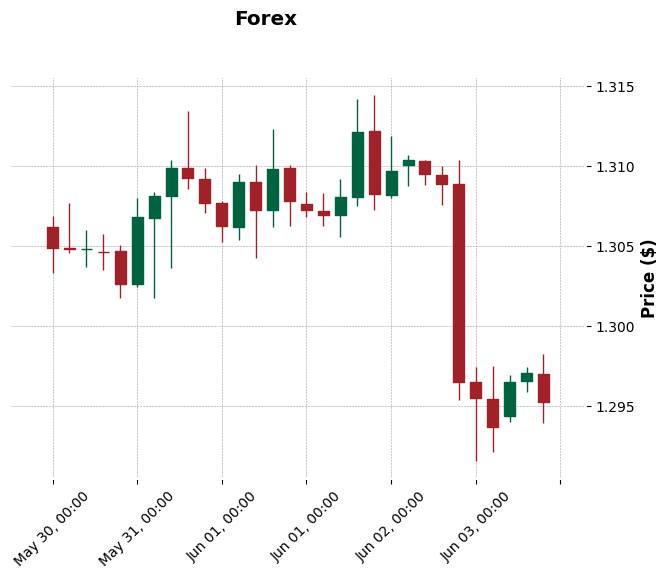

In [84]:
fplt.plot(
    data,
    type='candle',
    style='charles',
    title='Forex',
    ylabel='Price ($)'
)

In [83]:
fplt.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [95]:
data = pd.read_csv('1234_data.csv')

In [96]:
import plotly.express as px
fig = px.line(data, x="UTC_Time", y=['O-C'], title='USD_CAD', template = 'plotly_dark')
fig.show()

In [97]:
data = data[['O-C']]

In [98]:
data.head()

,O-C
0,0.00136
1,0.00001
2,-0.00001
3,0.00000
4,0.00205


In [99]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(30, 1)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(30, 1)"
9,CPU Jobs,-1


In [100]:
iforest = create_model('abod', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head(30)

,O-C,Anomaly,Anomaly_Score
0,0.00136,0,-7.402186e+14
1,0.00001,0,-2.336211e+18
2,-0.00001,0,-2.249656e+18
3,0.00000,0,-9.059903e+18
4,0.00205,0,-2.663245e+16
5,-0.00418,1,-4.876230e+12
6,-0.00138,0,-4.734736e+14
7,-0.00172,0,-4.237694e+13
8,0.00057,0,-6.556002e+16
9,0.00154,0,-1.015624e+15


In [101]:
iforest_results[iforest_results['Anomaly'] == 1].head()

,O-C,Anomaly,Anomaly_Score
5,-0.00418,1,-4.876230e+12
19,0.00393,1,-3.688537e+08
24,0.01238,1,-1.153110e+06


In [102]:
import plotly.graph_objects as go
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y="O-C", title='USD_CAD', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['O-C'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()